MATLAB描画をPythonに移植

https://www.zhihu.com/question/43309577

In [1]:
import piplite
await piplite.install(['plotly', 'nbformat'])
%matplotlib inline
import pylab as pl
import numpy as np
import plotly.graph_objects as go
from PIL import Image

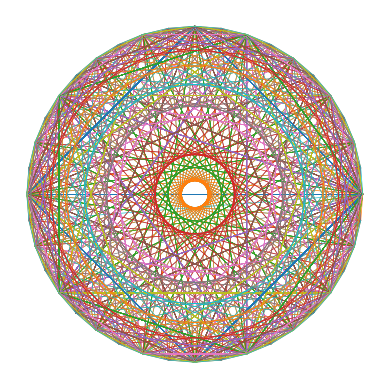

In [2]:
z = np.fft.fft(np.eye(40))
pl.plot(z.real, z.imag, lw=0.5)
ax = pl.gca()
ax.set_aspect('equal')
ax.axis('off');

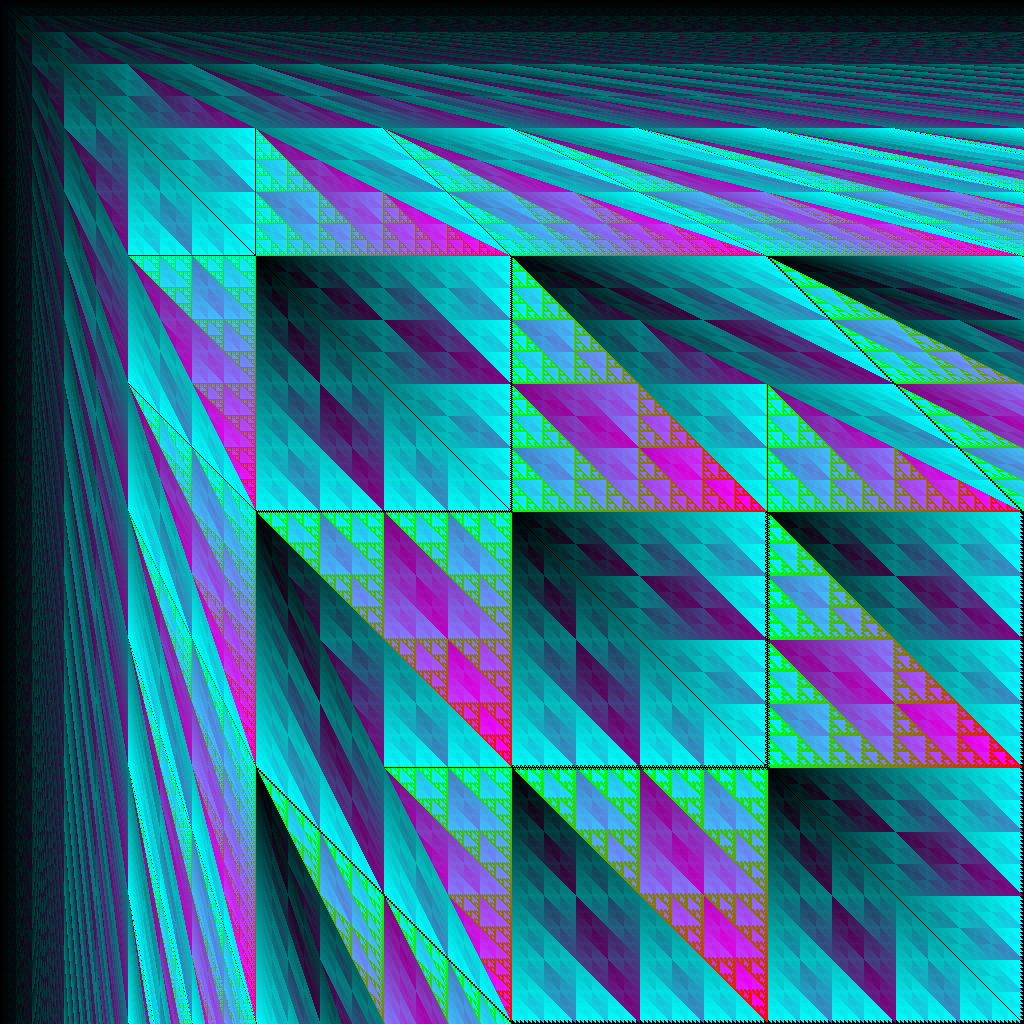

In [3]:
size = 1024
X, Y = np.meshgrid(np.r_[:size], np.r_[:size])
r = np.mod(np.mod(X, Y) & np.mod(Y, X), 255)
g = np.mod(np.mod(X, Y) ^ np.mod(Y, X), 255)
b = np.mod(np.mod(X, Y) | np.mod(Y, X), 255)
img = np.dstack((r, g, b)).astype(np.uint8)
Image.fromarray(img)

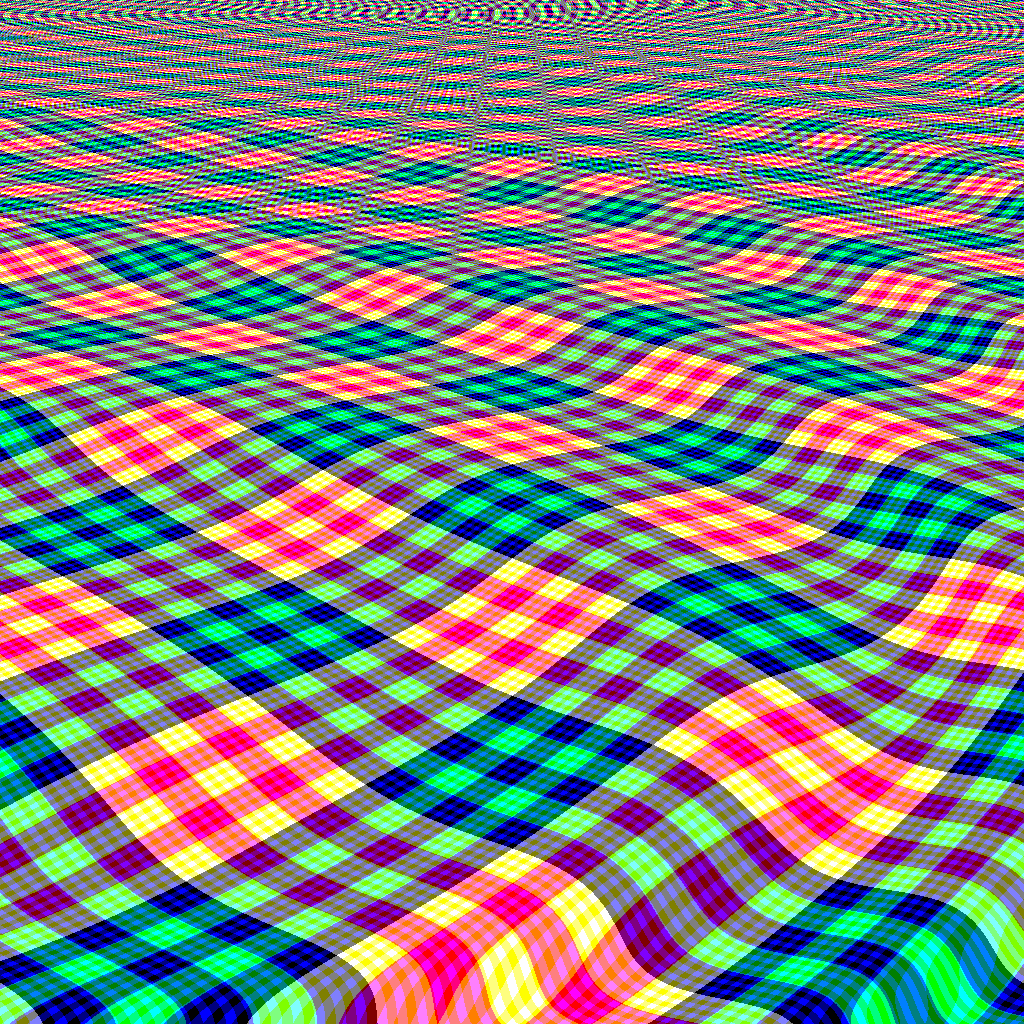

In [4]:
size = 1024
j, i = np.mgrid[:size, :size]
s = 3 / (j + 99)
y = (j + np.sin((i**2 + (j - 700)**2 * 5) / 100 / size) * 35) * s

t1 = (i + size) * s + y
t2 = (2 * size - i) * s + y
r = (np.mod(np.round(t1), 2) + np.mod(np.round(t2), 2)) * 127
g = (np.mod(np.round(5 * t1), 2) + np.mod(np.round(5 * t2), 2)) * 127
b = (np.mod(np.round(29 * t1), 2) + np.mod(np.round(29 * t2), 2)) * 127
img = np.dstack((r, g, b)).astype(np.uint8)
Image.fromarray(img)

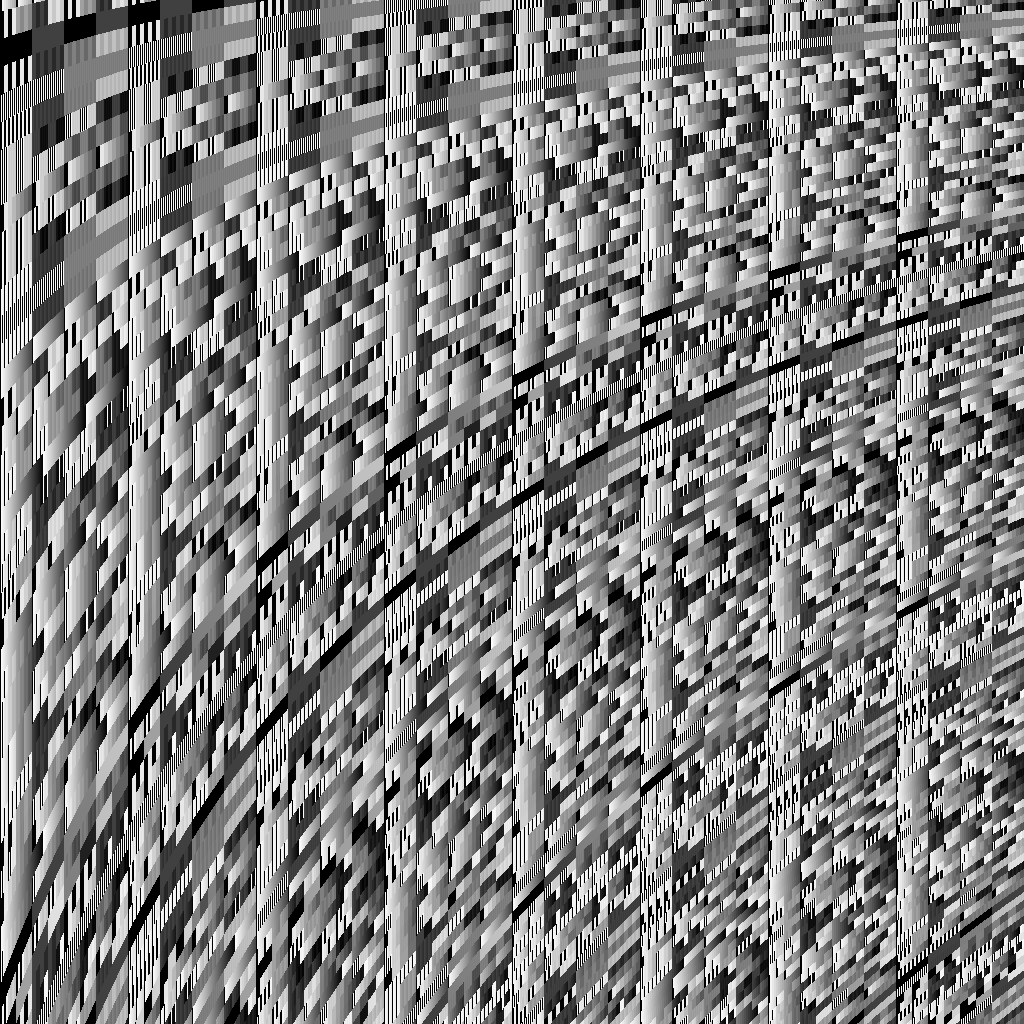

In [5]:
j, i = np.mgrid[:1024, :1024]
P = np.mod((np.floor(100 * np.sin(np.floor((i + 400) * (j + 100) / 11115))).astype(np.int16) & i.astype(np.int16)) * 1021, 256) * 2
Image.fromarray(P.astype(np.uint8))

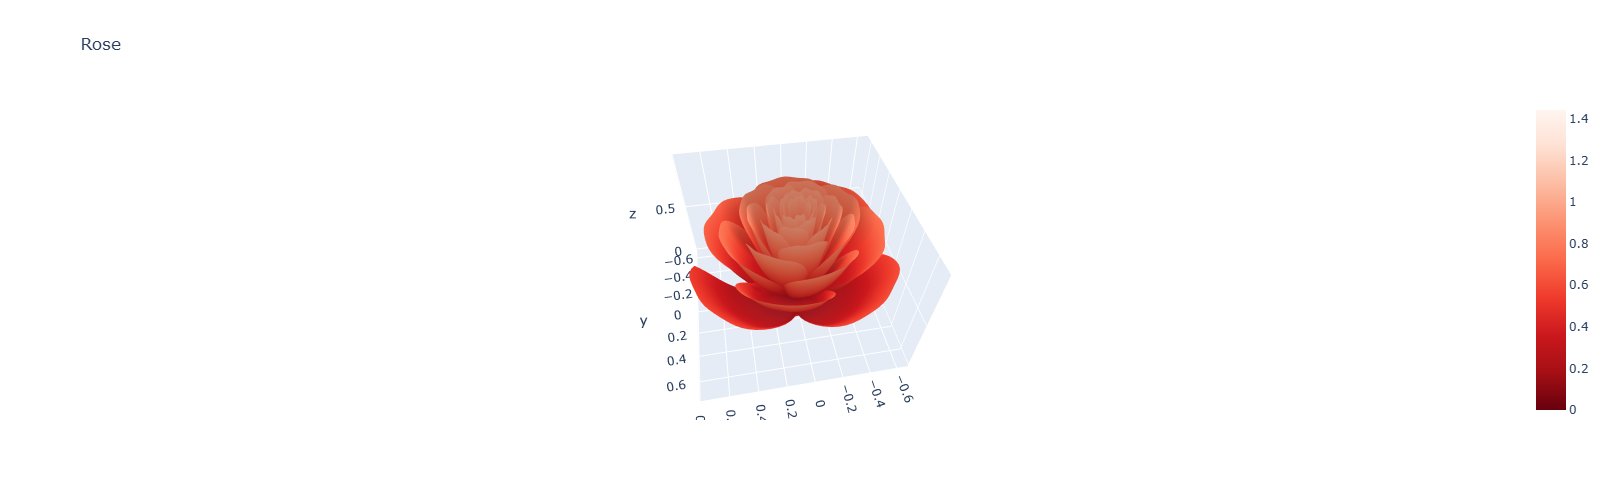

In [6]:
x, t = np.meshgrid(np.r_[0:24] / 24, np.r_[0:575:0.5]/575*20*np.pi+4*np.pi)
p = (np.pi / 2) * np.exp(-t / (8 * np.pi))
change = np.sin(15 * t) / 150
u = 1 - (1 - np.mod(3.6 * t, 2 * np.pi) / np.pi) ** 4 / 2 + change
y = 2 * (x**2 - x)**2 * np.sin(p)
r = u * (x * np.sin(p) + y * np.cos(p))
h = u * (x * np.cos(p) - y * np.sin(p))
X = r * np.cos(t)
Y = r * np.sin(t)
Z = h

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale='Reds_r', cmin=Z.min(), cmax=Z.max() * 1.5)])
fig.update_layout(title='Rose', autosize=False, width=500, height=500)
fig.show()